In [9]:
import autoreload
%load_ext autoreload
%autoreload 2

from image3c import imageprep, read_cif
from matplotlib import pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
f = 'Data/Male/Snail_Male_1.cif'
reader = read_cif.cifreader(f, [0,5,10])

Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.


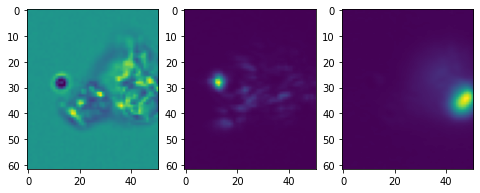

In [27]:
x = reader.get_image(10)
fig, ax = plt.subplots(1,3, figsize = (8,3))
ax[0].imshow(x[0])
ax[1].imshow(x[1])
ax[2].imshow(x[2])

In [22]:
cifs = [reader.get_image(c) for c in range(0,20000,2)]

AttributeError: 'list' object has no attribute 'size'

In [28]:
s = np.array([np.array(c.shape) for c in cifs])
s.shape

(10000, 3)

In [73]:
s.std(axis=0), np.where(s[:,1] == 187), (s[:,1] > 64).sum() 
cb = [i for i in cifs if i.shape[1] > 64] 

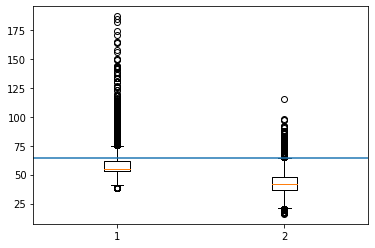

In [45]:
_ = plt.boxplot(s[:,[1,2]])
plt.axhline(64)

[]

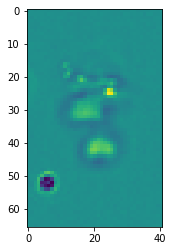

In [89]:
plt.imshow(cb[831][0])

In [47]:
import pickle

with open("testcif.pkl", 'wb') as f:
    pickle.dump(cifs, f)

In [50]:
ls -lh Data/Male/Snail_Male_1.cif

-rwxr-xr-x 1 cjw domain users 207M Mar 26  2019 Data/Male/Snail_Male_1.cif*


In [36]:
imageprep.run('subset/', 'mmfiles/')

Starting:  0 subset/
(984, 64, 64, 3)
Could not create padded image (269, 47)
Could not create padded image (269, 47)
Could not create padded image (269, 47)
Cannot make mmfiles/


In [37]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile

In [46]:
mmshape = np.memmap('mmfiles/subset.mm', shape=(4,), dtype=np.int32)
shape = tuple(mmshape)
del mmshape

In [47]:
mm = np.memmap('mmfiles/subset.mm', mode='r', offset=4*32, shape=shape, dtype=np.float32)

In [48]:
mm.shape

(984, 64, 64, 3)

In [33]:
ls

mmfiles/  Snail1/  subset/  subset_index.pkl*  Untitled.ipynb*


In [4]:
import jpype
jpype.__version__

'1.2.1'